Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "SIMON ANDREN"
COLLABORATORS = "NA"

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [2]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    hires = 0 #Variable for the number of hirees
    best = -float("inf") #Variable to the best candidate (negative infinity is the begining cause noone is hires)
    
    for app in applicants:#loops through every applicant to check if they are better that the prevois assistant
        if best < app: #if better
            hires += 1 #hire
            best = app #Change who is the best candidate
    
    return hires
    raise NotImplementedError()

In [3]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [4]:
import random
def experimental_hires(N):
    
    hire_list = [] #list of the number of hires for the simulations
    
    for i in range(100): #Loops 100 times to better find an average runtime
        
        hires = 0 #Variable for the number of hirees
        best = -float("inf") #Variable to the best candidate (negative infinity is the begining cause noone is hires)
        applicants = [random.random() for x in range(N)] # A N long list of  random uniform distribution of float 0 <= n < 1
        
        for app in applicants:#loops through every applicant to check if they are better that the prevois assistant
            if best < app: #if better
                hires += 1 #hire
                best = app #Change who is the best candidate
        
        hire_list.append(hires) #Appends the number of hires to the hire_list
    
    
    return sum(hire_list)/len(hire_list)

    raise NotImplementedError()
    

## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [5]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

<function matplotlib.pyplot.show(*args, **kw)>

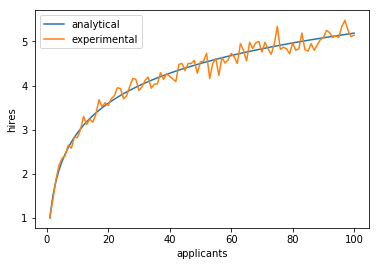

In [11]:
import matplotlib.pyplot as plt

graph_x = [N for N in range(1,101)] #List for all the number of applicants. I did 1-100
curve_1_y = [analytical_hires(N) for N in range(1,101)] #Calculate the analytical number of hires
curve_2_y = [experimental_hires(N) for N in range(1,101)] #Simulate teh experimental number of hires

plt.plot(graph_x, curve_1_y, label = "analytical") #plot the analytical graph
plt.plot(graph_x, curve_2_y, label = "experimental") #plot the experimental graph

plt.xlabel('applicants')
plt.ylabel('hires')

plt.legend()

plt.show



#raise NotImplementedError()

## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

<function matplotlib.pyplot.show(*args, **kw)>

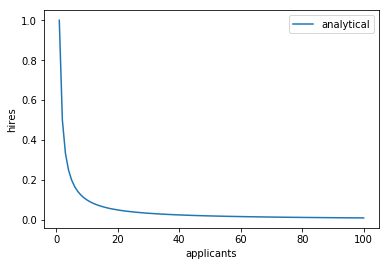

In [7]:
import matplotlib.pyplot as plt

graph_x = [N for N in range(1,101)] #the number of applicants
curve_1_y = [1/N for N in range(1,101)] #Probability that application n is the best of a pool with N applicants is 1/N


plt.plot(graph_x, curve_1_y, label = "analytical") #Plot the graph


plt.xlabel('applicants')
plt.ylabel('hires')

plt.legend()

plt.show


#raise NotImplementedError()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [8]:
# YOUR CODE HERE
#raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

I believe we need to generate a random sample for the N hats recived. This is because the attendant will give out the hats at random which can be made into code using a random sampled list. The list order should not depend on the order of the input list

## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 will shuffle the hatlist at random overwriting the original input. I believe this is most accurate as each hat only appears one and is suffled at random. 
Command 3 could also work if the sampling would be done n times from the orginal hat list without replacement. This is not the case as we are only sampling one hat in this code. 

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [9]:
import numpy as np

def hat_check(N):
    
    corr_return_list = [] #list of correct returns
    
    for i in range(100): #simulate 1000 times
        
        corr_return = 0
        
        hat_list = list(range(N)) #generate a list of N number from 0 to N-1
        np.random.shuffle(hat_list) #randomly shuffels the list
        
        for i in range (N): #loops through a sorted leaving of attendeese. We don't need to have a random leaving 
            if i == hat_list[i]: #if the hat belongs to the person leaving
                corr_return += 1
        
        corr_return_list.append(corr_return)
        
    return sum(corr_return_list)/len(corr_return_list) #return the average

    
#raise NotImplementedError()


## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

<function matplotlib.pyplot.show(*args, **kw)>

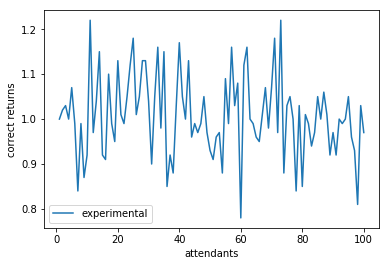

In [10]:
import matplotlib.pyplot as plt

graph_x = [N for N in range(1,101)] #the number of persons attending the party
curve_1_y = [hat_check(N) for N in range(1,101)] #the average correct returns for N attendants


plt.plot(graph_x, curve_1_y, label = "experimental") #Plot the graph


plt.xlabel('attendants')
plt.ylabel('correct returns')

plt.legend()

plt.show



## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE